In [ ]:
import pandas as pd
import librosa as lb
import soundfile as sf 
from scipy.signal import butter, lfilter

In [ ]:
file_data = pd.read_csv('file_data.csv')

In [ ]:
file_data

In [4]:
file_data[file_data.fname == '226_1b1_Pl_sc_LittC2SE']

,fname,start,end,crack_wheez,fname_cycle,len
6727,226_1b1_Pl_sc_LittC2SE,0.036,1.207,0,226_1b1_Pl_sc_LittC2SE_0.wav,1.171
6728,226_1b1_Pl_sc_LittC2SE,1.207,3.550,0,226_1b1_Pl_sc_LittC2SE_1.wav,2.343
6729,226_1b1_Pl_sc_LittC2SE,3.550,5.750,1,226_1b1_Pl_sc_LittC2SE_2.wav,2.200
6730,226_1b1_Pl_sc_LittC2SE,5.750,7.879,1,226_1b1_Pl_sc_LittC2SE_3.wav,2.129
6731,226_1b1_Pl_sc_LittC2SE,7.879,9.836,0,226_1b1_Pl_sc_LittC2SE_4.wav,1.957
6732,226_1b1_Pl_sc_LittC2SE,9.836,11.721,1,226_1b1_Pl_sc_LittC2SE_5.wav,1.885
6733,226_1b1_Pl_sc_LittC2SE,11.721,13.693,1,226_1b1_Pl_sc_LittC2SE_6.wav,1.972
6734,226_1b1_Pl_sc_LittC2SE,13.693,15.536,0,226_1b1_Pl_sc_LittC2SE_7.wav,1.843
6735,226_1b1_Pl_sc_LittC2SE,15.536,17.493,0,226_1b1_Pl_sc_LittC2SE_8.wav,1.957
6736,226_1b1_Pl_sc_LittC2SE,17.493,19.436,1,226_1b1_Pl_sc_LittC2SE_9.wav,1.943


In [5]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [7]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 4000.0
lowcut = 100.0
highcut = 1800.0


In [ ]:
wav, sr = lb.load('audio_and_txt_files/226_1b1_Pl_sc_LittC2SE.wav', sr = 4000)
bb = butter_bandpass_filter(wav, lowcut, highcut, fs, order=12)


In [ ]:
sf.write('filt_226_1b1_Pl_sc_LittC2SE.wav', data=bb, samplerate=sr )

In [ ]:
file_data[file_data.fname == '223_1b1_Ar_sc_Meditron']

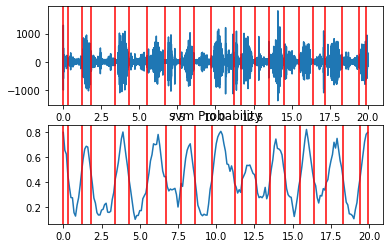

In [28]:
[Fs, x] = aIO.read_audio_file('/home/014544907/Master_Project/filt_226_1b1_Pl_sc_LittC2SE.wav')
segments = aS.silence_removal(x, Fs, 0.1, 0.1, smooth_window = 0.8, weight = 0.4, plot = True)

In [29]:
segments

[[0.0, 0.30000000000000004],
 [1.2000000000000002, 1.8],
 [3.4000000000000004, 4.3],
 [5.5, 6.7],
 [7.7, 8.6],
 [9.700000000000001, 11.200000000000001],
 [11.700000000000001, 12.600000000000001],
 [13.5, 14.5],
 [15.5, 16.400000000000002],
 [17.2, 18.3],
 [19.400000000000002, 19.900000000000002]]

In [10]:
import os
os.getcwd()

'/home/014544907/Master_Project'

In [11]:
os.chdir('/home/014544907/anaconda3/envs/master_project/lib/python3.8/site-packages/pyAudioAnalysis/')

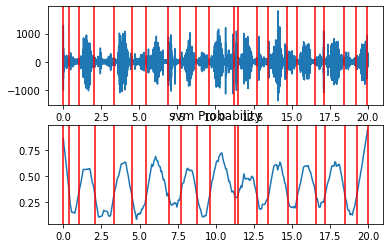

In [12]:
%run audioAnalysis.py silenceRemoval -i /home/014544907/Master_Project/filt_226_1b1_Pl_sc_LittC2SE.wav --smoothing 1.0 --weight 0.3